In [2]:
# Importing all necessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import classification_report 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import os

In [3]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
# reading the datasets
details_df = pd.read_csv("Details.csv")
orders_df = pd.read_csv("Orders.csv")

### Diplaying the first rows of the details dataset

In [6]:
details_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode
0,B-25681,1096,658,7,Electronics,Electronic Games,COD
1,B-26055,5729,64,14,Furniture,Chairs,EMI
2,B-25955,2927,146,8,Furniture,Bookcases,EMI
3,B-26093,2847,712,8,Electronics,Printers,Credit Card
4,B-25602,2617,1151,4,Electronics,Phones,Credit Card


In [7]:
orders_df.head()

,Order ID,Order Date,CustomerName,State,City
0,B-26055,10-03-2018,Harivansh,Uttar Pradesh,Mathura
1,B-25993,03-02-2018,Madhav,Delhi,Delhi
2,B-25973,24-01-2018,Madan Mohan,Uttar Pradesh,Mathura
3,B-25923,27-12-2018,Gopal,Maharashtra,Mumbai
4,B-25757,21-08-2018,Vishakha,Madhya Pradesh,Indore


### Exploring the datasets

In [8]:
# Details Dataset
print(details_df.info())
print(details_df.describe())

# Orders Dataset
print(orders_df.info())
print(orders_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      1500 non-null   object
 1   Amount        1500 non-null   int64 
 2   Profit        1500 non-null   int64 
 3   Quantity      1500 non-null   int64 
 4   Category      1500 non-null   object
 5   Sub-Category  1500 non-null   object
 6   PaymentMode   1500 non-null   object
dtypes: int64(3), object(4)
memory usage: 82.2+ KB
None
            Amount      Profit     Quantity
count  1500.000000  1500.00000  1500.000000
mean    291.847333    24.64200     3.743333
std     461.924620   168.55881     2.184942
min       4.000000 -1981.00000     1.000000
25%      47.750000   -12.00000     2.000000
50%     122.000000     8.00000     3.000000
75%     326.250000    38.00000     5.000000
max    5729.000000  1864.00000    14.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0

In [9]:
print(details_df.isnull().sum())
print(orders_df.isnull().sum())

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
PaymentMode     0
dtype: int64
Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64


- Both datasets have no null values

### Converting the Order Date column to Date type

In [10]:
# Converting the Order Date column to Date type
orders_df["Order Date"] = pd.to_datetime(orders_df["Order Date"],format="mixed")
orders_df["Year"] = orders_df["Order Date"].dt.year
orders_df["Month"] = orders_df["Order Date"].dt.month
orders_df.head()

,Order ID,Order Date,CustomerName,State,City,Year,Month
0,B-26055,2018-10-03,Harivansh,Uttar Pradesh,Mathura,2018,10
1,B-25993,2018-03-02,Madhav,Delhi,Delhi,2018,3
2,B-25973,2018-01-24,Madan Mohan,Uttar Pradesh,Mathura,2018,1
3,B-25923,2018-12-27,Gopal,Maharashtra,Mumbai,2018,12
4,B-25757,2018-08-21,Vishakha,Madhya Pradesh,Indore,2018,8


In [11]:
# Merge datasets on 'Order ID'
merged_df = pd.merge(details_df, orders_df, on='Order ID', how='inner')

# Display the merged dataset to inspect the results
merged_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year,Month
0,B-25681,1096,658,7,Electronics,Electronic Games,COD,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018,4
1,B-25681,1625,-77,3,Electronics,Phones,EMI,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018,4
2,B-25681,523,204,7,Clothing,Trousers,COD,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018,4
3,B-25681,44,-3,1,Clothing,Saree,Debit Card,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018,4
4,B-25681,243,-14,2,Furniture,Chairs,COD,2018-04-06,Bhawna,Madhya Pradesh,Indore,2018,4


#### Which category of products sells the most? 

In [13]:
# Sales by Category
category_sales = merged_df.groupby('Category')['Amount'].sum().reset_index()
print(category_sales)

      Category  Amount
0     Clothing  144323
1  Electronics  166267
2    Furniture  127181


#### Creating a visual representation of sales categorized by product type

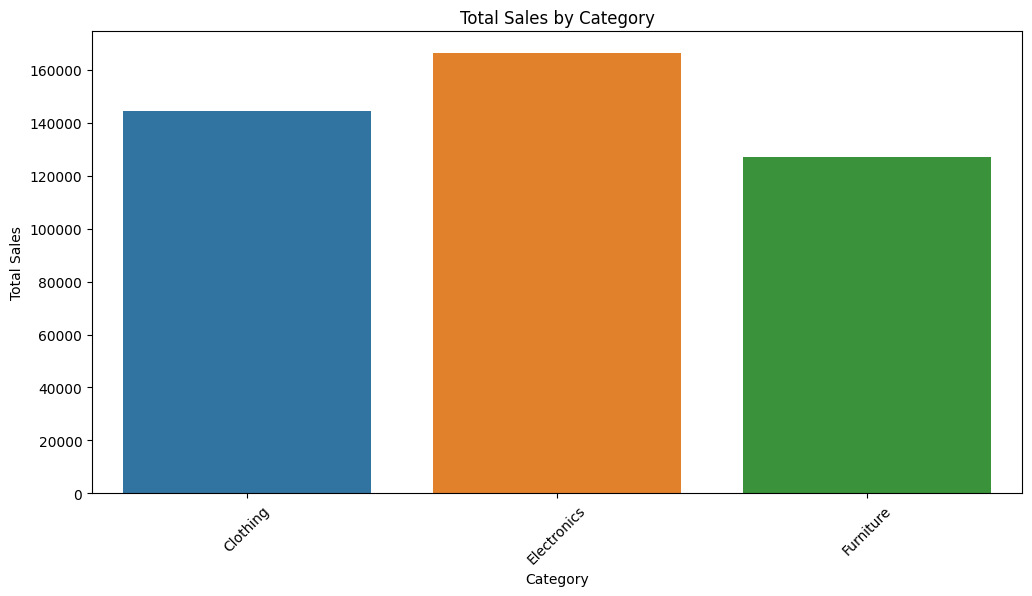

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Amount', data=category_sales)
plt.title('Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

- The highest-selling category is Electronics, with Clothing following closely behind in terms of sales.

#### What are the most sold products in Electronics?

In [15]:
electronics_df = merged_df[merged_df["Category"]=="Electronics"]
subcategory_sales = electronics_df.groupby("Sub-Category")["Amount"].sum().reset_index()
most_sold_products = subcategory_sales.sort_values(by="Amount",ascending=False)

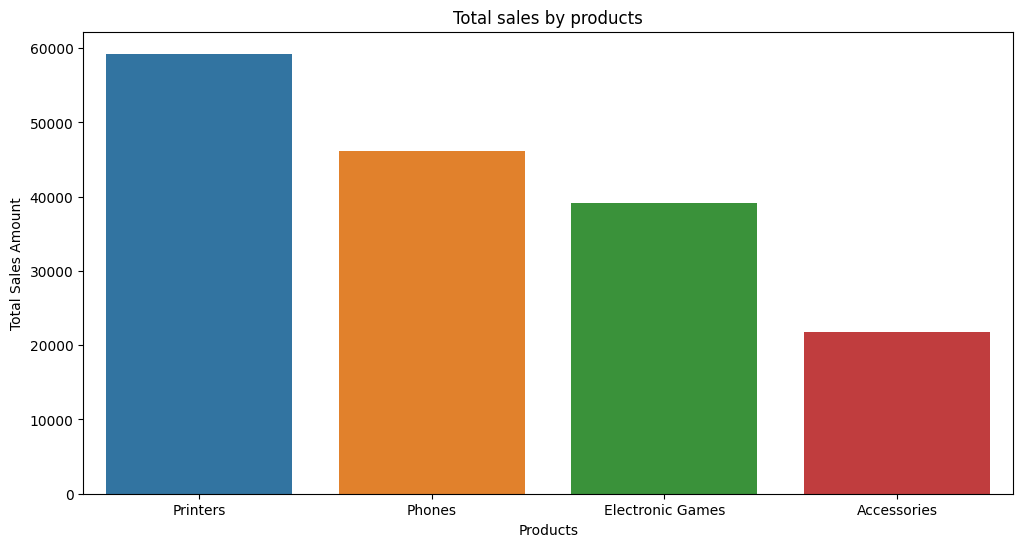

In [16]:
plt.figure(figsize=(12,6))
sns.barplot(x="Sub-Category",y="Amount",data=most_sold_products)
plt.title("Total sales by products")
plt.xlabel("Products")
plt.ylabel("Total Sales Amount")
plt.show()

- Printers rank as the top-selling products in the Electronics category.

### What are the cities and states that have the most sales?

In [17]:
# Sales by City
city_sales = merged_df.groupby('City')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

# Sales by State
state_sales = merged_df.groupby('State')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

### Visualizing sales by city and state

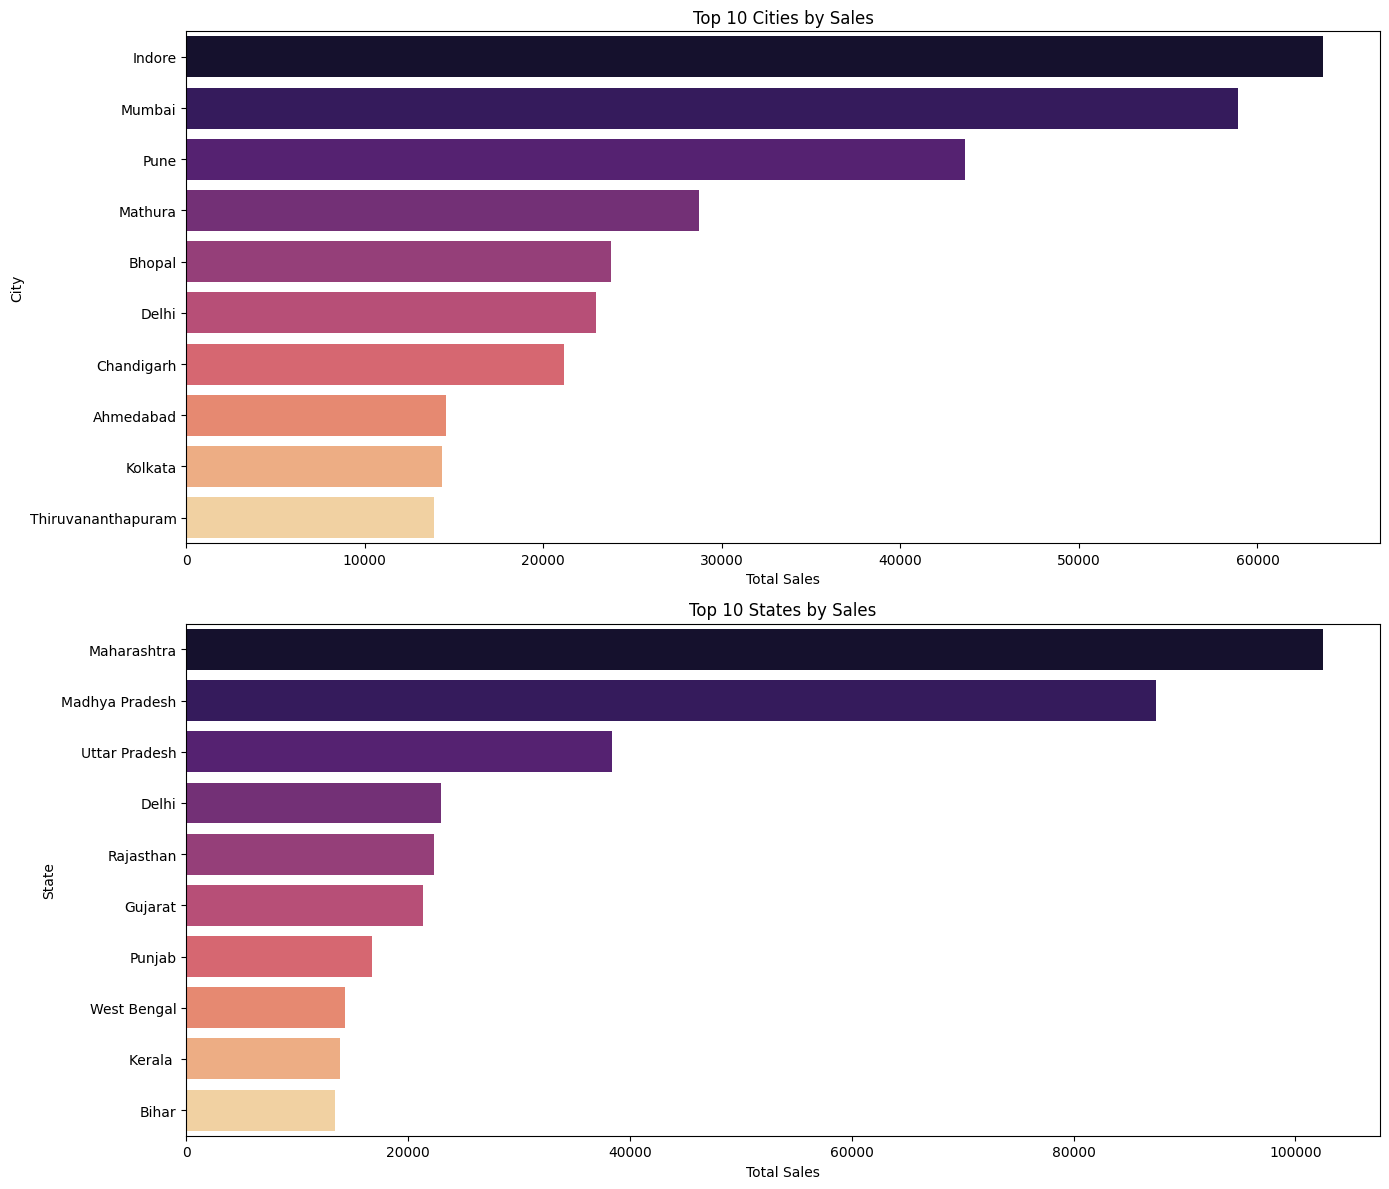

In [23]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 12))

# Bar chart for Sales by City
sns.barplot(x='Amount', y='City', data=city_sales.head(10), ax=axes[0], palette='magma')
axes[0].set_title('Top 10 Cities by Sales')
axes[0].set_xlabel('Total Sales')
axes[0].set_ylabel('City')

# Bar chart for Sales by State
sns.barplot(x='Amount', y='State', data=state_sales.head(10), ax=axes[1], palette='magma')
axes[1].set_title('Top 10 States by Sales')
axes[1].set_xlabel('Total Sales')
axes[1].set_ylabel('State')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

- The graphs indicate that the states of "Maharashtra" and "Madhya Pradesh" stand out as the most lucrative regions for the company. Additionally, the cities of "Indore" and "Mumbai" exhibit the highest sales compared to other cities in India.

#### What are the Months that have the most sales?

In [19]:
monthly_sales = merged_df.groupby("Month")["Amount"].sum().reset_index().sort_values(by="Amount",ascending=False)

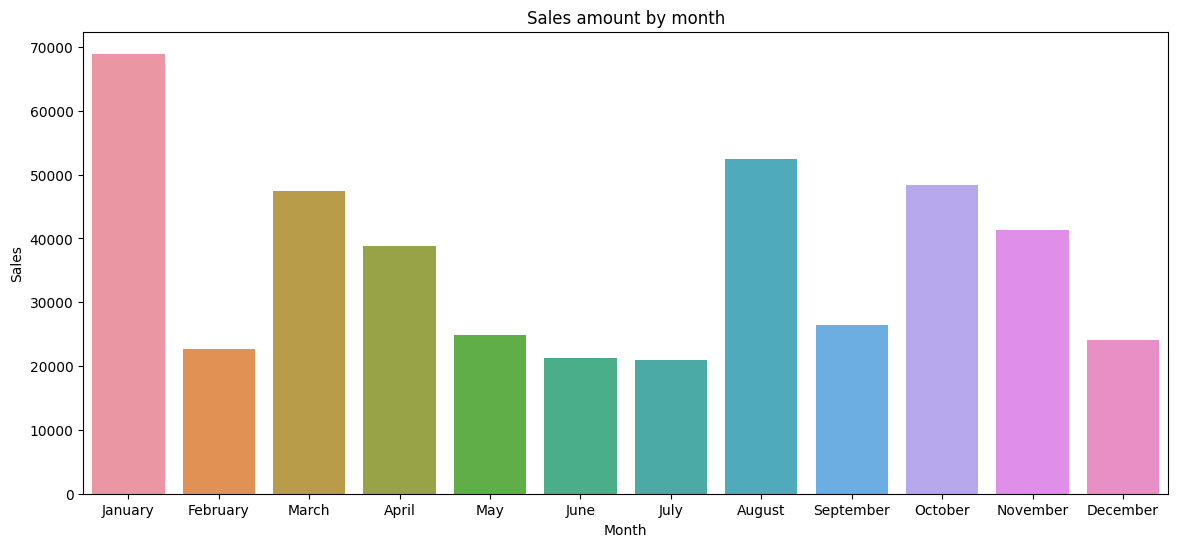

In [20]:
plt.figure(figsize=(14, 6))
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(x="Month",y="Amount",data = monthly_sales)
plt.title("Sales amount by month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.xticks(ticks=range(12),labels=month_names)
plt.show()

- The month with the highest sales is January, with August and October following closely in terms of sales volume.